In [15]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [238]:
start_plot = True
frq_min = 0.15/(6*np.pi) 
frq_max = 0.75/(6*np.pi)
wvl_max = 1/frq_min
wvl_min = 1/frq_max
nfreq = 500
fcen = (frq_min + frq_max)/2
df = frq_max - frq_min
dfp = 1/2

In [239]:
dpml = np.floor(0.5*wvl_max)+1

dA = 2
dB = 3
epsilonA = 12
epsilonB = 3

NAB = 20

sz = 4*dpml+(dA+dB)*NAB

resolution = 200 # pixels/μm

freg_p = 1
cell_size = mp.Vector3(z=sz)

pml_layers = [mp.PML(thickness=dpml)]

In [240]:
def BlockAB(N, center):
    geometry = []
    for i in range(N):
        geometry = np.append(geometry, mp.Block(mp.Vector3(mp.inf,mp.inf,dA),
                     center=mp.Vector3(z=center-(dA+dB)*N/2 + (dA+dB)*i + dA/2),
                     material=mp.Medium(epsilon=epsilonA)))
        geometry = np.append(geometry, mp.Block(mp.Vector3(mp.inf,mp.inf,dB),
                     center=mp.Vector3(z=center-(dA+dB)*N/2 + (dA+dB)*i + dA + dB/2),
                     material=mp.Medium(epsilon=epsilonB)))
    geometry = geometry.tolist()
    return geometry

In [241]:
def BlockBA(N, center):
    geometry = []
    for i in range(N):
        geometry = np.append(geometry, mp.Block(mp.Vector3(mp.inf,mp.inf,dB),
                     center=mp.Vector3(z=center-(dA+dB)*N/2 + (dA+dB)*i + dB/2),
                     material=mp.Medium(epsilon=epsilonB)))
        geometry = np.append(geometry, mp.Block(mp.Vector3(mp.inf,mp.inf,dA),
                     center=mp.Vector3(z=center-(dA+dB)*N/2 + (dA+dB)*i + dB + dA/2),
                     material=mp.Medium(epsilon=epsilonA)))
    geometry = geometry.tolist()
    return geometry

In [242]:
sources = [mp.Source(mp.GaussianSource(fcen,fwidth=df),
                     component=mp.Ex,
                     center=mp.Vector3(z=-0.5*sz+dpml),
                     size=mp.Vector3())]

In [243]:
sim_vac = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    dimensions=1,
                    sources=sources)
tran_fr = mp.FluxRegion(center=mp.Vector3(z=(dA+dB)*NAB/2+freg_p))
tran = sim_vac.add_flux(fcen, df*dfp, nfreq, tran_fr)

In [244]:
pt = mp.Vector3(z=(dA+dB)*NAB/2+freg_p)
sim_vac.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ex,pt,1e-3))

-----------
Initializing structure...
time for choose_chunkdivision = 0.0105591 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 352 with resolution 200
time for set_epsilon = 0.0861151 s
-----------
on time step 16152 (time=40.38), 0.000247662 s/step
on time step 32343 (time=80.8575), 0.000247053 s/step
on time step 48431 (time=121.078), 0.00024864 s/step
on time step 64548 (time=161.37), 0.0002482 s/step
field decay(t = 200.0075): 1.47995123988645e-07 / 1.47995123988645e-07 = 1.0
on time step 80492 (time=201.23), 0.000250889 s/step
on time step 96420 (time=241.05), 0.000251142 s/step
field decay(t = 250.01000000000002): 0.0005824328860406799 / 0.0005824328860406799 = 1.0
on time step 112639 (time=281.598), 0.000246638 s/step
field decay(t = 300.01): 0.1585469625475858 / 0.1585469625475858 = 1.0
on time step 128772 (time=321.93), 0.000247944 s/step
field decay(t = 350.0125): 0.250000037018739 / 0.250000037018739 = 1.0
on time step 144834 (time=362.085), 0.000249035 s/step
fie

In [245]:
vac_flux = mp.get_fluxes(tran)

In [246]:
geometry = sum([BlockAB(10,10*(dA+dB)/2),BlockBA(10,-10*(dA+dB)/2)],[])
sim = mp.Simulation(cell_size=cell_size,
                    resolution=resolution,
                    boundary_layers=pml_layers,
                    sources=sources,
                    dimensions=1,
                    geometry=geometry)
tran_fr = mp.FluxRegion(center=mp.Vector3(z=(dA+dB)*NAB/2+freg_p))
tran = sim.add_flux(fcen, df*dfp, nfreq, tran_fr)

In [247]:
pt = mp.Vector3(z=(dA+dB)*NAB/2+freg_p)

sim.run(until_after_sources=mp.stop_when_fields_decayed(50,mp.Ex,pt,1e-3))

-----------
Initializing structure...
time for choose_chunkdivision = 0.00744295 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 352 with resolution 200
     block, center = (0,0,1)
          size (1e+20,1e+20,2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (0,0,3.5)
          size (1e+20,1e+20,3)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3,3,3)
     block, center = (0,0,6)
          size (1e+20,1e+20,2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (0,0,8.5)
          size (1e+20,1e+20,3)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (3,3,3)
     block, center = (0,0,11)
          size (1e+20,1e+20,2)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (0,0,13.5)
 

In [248]:
if start_plot:
    wl=[]
    Ts=[]

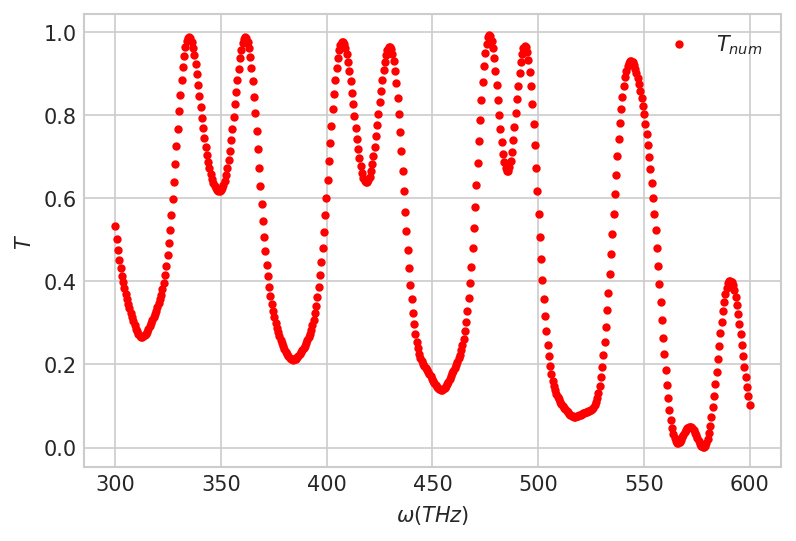

In [249]:
tran_flux = mp.get_fluxes(tran)
flux_freqs = mp.get_flux_freqs(tran)
for i in range(nfreq):
    wl = np.append(wl, 2*flux_freqs[i]*np.pi*3*10**3)
    Ts = np.append(Ts,tran_flux[i]/vac_flux[i])    

if mp.am_master():
    plt.figure(dpi=150)
    plt.style.use('seaborn-whitegrid')
    plt.plot(wl,Ts,'r.',label='$T_{num}$')
    plt.xlabel(r'$\omega(THz)$')
    plt.ylabel('$T$')
    plt.legend(loc="upper right")
    plt.savefig('Tasks_2_5(10).png')
    plt.show()    